# 2D Poisson Code

In [1]:
using Plots; pyplot()
using Printf
using LaTeXStrings
using Revise

In [4]:
using Poisson2D

## Test Problem
The eigenfunctions of $-\Delta$ on the box $(0,1)\times (0,1)$ with Dirichlet Boundary conditions are
$$
\varphi_{k_x,k_y}(x,y) = \sin(k_x \pi x) \sin(k_x \pi x).
$$
So we can use, as test data,
$$
f = -\Delta \varphi_{k_x,k_y} = \pi^2(k_x^2 + k_y^2) \sin(k_x \pi x) \sin(k_x \pi x)
$$

In [22]:
a = 0;
b = 1;
c = 0;
d = 1;
n = 19;

kx = 3;
ky = 2;
u_exact = (x,y) ->  sin(kx*π*(x-a)/(b-a)) * sin(ky*π*(y-c)/(d-c));
f = (x,y)->((kx*π/(b-a))^2 + (ky * π/(d-c))^2) * sin(kx*π*(x-a)/(b-a)) * sin(ky*π*(y-c)/(d-c))

#9 (generic function with 1 method)

In [43]:
problem = FDPoisson2DProblem(a,b,c,d,n,f);
# nx = 19;
# ny = 39;
# zero_function = (x,y)-> 0;
# zero_bc = DirichletBC(zero_function);
# problem =FDPoisson2DProblem(a, b, c, d, nx, ny, f, zero_bc, zero_bc, zero_bc, zero_bc);

In [38]:
assemble_system!(problem);

In [39]:
U = direct_solve_poisson2d(problem);

In [40]:
# u = reshape(U,n,n);
u = reshape(U,nx,ny);

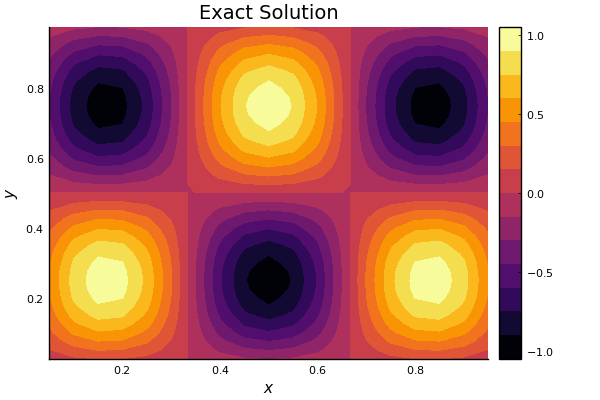

In [41]:
contourf(problem.x, problem.y, [u_exact(x_,y_) for y_ in problem.y, x_ in problem.x])
xlabel!(L"$x$")
ylabel!(L"$y$")
title!("Exact Solution")

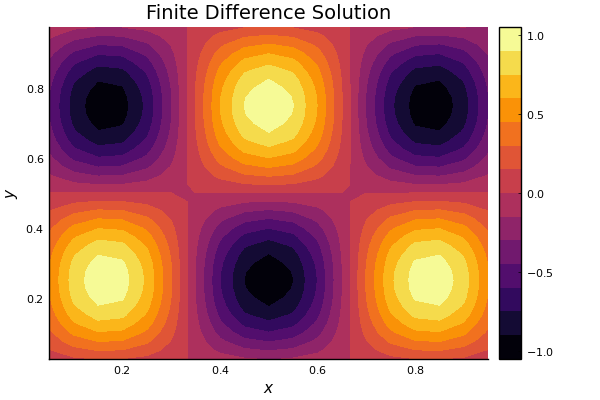

In [42]:
contourf(problem.x, problem.y, u')
xlabel!(L"$x$")
ylabel!(L"$y$")
title!("Finite Difference Solution")